# 导入文件和必要的包


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
import re
data_bra = pd.read_csv(r'D:\data_set\bra\bra.csv') 
data_color = pd.read_csv(r'D:\data_set\bra\colors.csv',names=['productColor','productcolor'], header = 0)

# 数据清洗

In [2]:
'''处理颜色数据'''

bra = pd.merge(data_bra.dropna(),data_color.dropna(),how='outer')        
bra.drop('productColor', axis = 1, inplace = True)    #删掉原来的列
size_index = pd.unique(bra['productSize'])    #查看尺码数据剩余的都有那些类型，便于进一步分析
size_index

array(['75C', '80B', '75B', '70C', '80C', '85B', '70B', '85C', '75C/34C',
       '80B/36B', '85B/38B', '80C/36C', '75A/34A', '75B/34B', '70A/32A',
       '80A/36A', '70B/32B', '85A/38A', '85C/38C', '70C/32C', 'B80',
       'C80', 'C75', 'B70', 'B75', 'C70', '165/76/L', '160/70/M',
       '170/82/XL', '90C/40C', '90B/40B', '85D/38D', '85E/38E', '80D/36D',
       '75E/34E', '90D/40D', '95C', '80E/36E', '95D', '75D/34D',
       '80B=36B', '90D=40D', '90C=40C', '85A=38A', '85B=38B', '85C=38C',
       '75B=34B', '90B=40B', '85B/38', '80B/36', '75B/34', '80A=36A',
       '70A=32A', '75A=34A', 'A80', 'A85', 'A75', 'C85', 'B85',
       '40/90A=XL码', '34/75D=L码', '32/70B=S码', '36/80B=L码', '38/85A=L码',
       '38/85C=XL码', '38/85B=XL码', '36/80C=L码', '38/85D=XL码', '34/75B=M码',
       '34/75A=S码', '40/90C=XL码', '36/80A=M码', '34/75C=M码', '75B=34B ',
       '34/75ab中厚2cm', '80C=36C', '70B=32B', '75C=34C', '34B/75B',
       '34/75B', '40C/90C', '36B/80B', '38B/85B', '36C/80C', '90E/40E',
       '95E'

In [3]:
'''处理尺码数据，先删除内裤尺码以及没有明确的指向大小的垃圾数据'''

p = re.compile(r'1\d\d\/\d\d\/[a-zA-Z][a-zA-Z]?|[7-9][\d][\w][\w]')    
#正则表达式,匹配两个条件，中间用竖杠'|'隔开。
#第一个条件匹配出所有的类似于“165/70/m”的尺码格式
#第二个条件匹配出在70-100的尺码计量情况下，含有两个字母的不明尺码，如：70ab，80ab等
for i in range(len(bra['productSize'])): 
    try:
        size_match = p.findall(bra['productSize'][i])
    except:
        continue
    
    if size_match:    
        bra = bra[~bra['productSize'].isin([bra['productSize'][i]])]     

size_index = pd.unique(bra['productSize'])    #查看尺码数据剩余的都有那些类型，便于进一步分析
bra.index = range(len(bra))
bra

,creationTime,productSize,productcolor
0,2016-06-08 17:17:00,75C,棕色
1,2017-04-07 19:34:25,80B,棕色
2,2017-08-03 20:39:18,80B,棕色
3,2016-07-06 14:02:08,75B,棕色
4,2017-03-18 11:49:55,80B,棕色
...,...,...,...
15085,2017-11-03 16:39:13,34A/75A,粉色
15086,2017-11-07 23:03:10,34B/75B,粉色
15087,2017-11-14 17:25:37,34A/75A,粉色
15088,2017-11-11 00:13:32,36C/80C,粉色


In [4]:
'''统一尺码计量单位'''    
a = re.compile(r'[7-9]\d\w')    #匹配数字在前字母在后类似"75B"的格式
b = re.compile(r'\w[7-9]\d')    #匹配字母在前数字在后类似"C80"的格式
c = re.compile(r'([7-9]\d)\/\d\d(\w)')    #从'85/38C'这种数据提取出（85，C）
for j in range(len(bra['productSize'])):
    try:
        size_match1 = a.findall(bra['productSize'][j])
        size_match2 = b.findall(bra['productSize'][j])
        size_match3 = c.findall(bra['productSize'][j])
        if size_match1:
            #print(size_match1)
            bra['productSize'][j] = size_match1[0].upper()    #第一种格式的数据是想要得到的标准数据，所以直接赋值 
        if size_match2:
            # print(size_match2) 
            bra['productSize'][j] = size_match2[0][1:] + size_match2[0][0].upper()    #调换字母和数字的前后位置
        if size_match3:
            bra['productSize'][j] = size_match3[0][0] + size_match3[0][1].upper()    #拼接成数字在前字母在后的格式
    except:
        continue

print(bra)
size_index = pd.unique(bra['productSize'])    
size_index

              creationTime productSize productcolor
0      2016-06-08 17:17:00         75C           棕色
1      2017-04-07 19:34:25         80B           棕色
2      2017-08-03 20:39:18         80B           棕色
3      2016-07-06 14:02:08         75B           棕色
4      2017-03-18 11:49:55         80B           棕色
...                    ...         ...          ...
15085  2017-11-03 16:39:13         75A           粉色
15086  2017-11-07 23:03:10         75B           粉色
15087  2017-11-14 17:25:37         75A           粉色
15088  2017-11-11 00:13:32         80C           粉色
15089  2016-12-20 13:51:34         75B           粉色

[15090 rows x 3 columns]


array(['75C', '80B', '75B', '70C', '80C', '85B', '70B', '85C', '75A',
       '70A', '80A', '85A', '90C', '90B', '85D', '85E', '80D', '75E',
       '90D', '95C', '80E', '95D', '75D', '90A', '90E', '95E'],
      dtype=object)

# 数据可视化

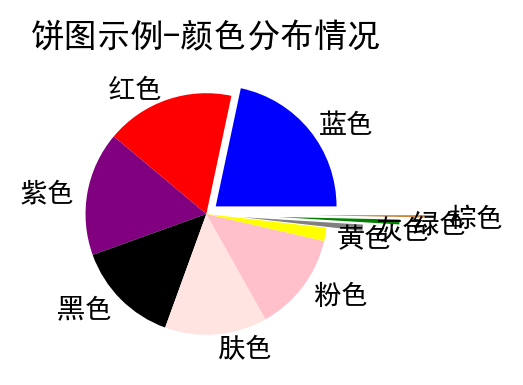

In [5]:
'''可视化颜色'''
plt.figure(figsize = (3, 2), dpi =200)
color_count = bra['productcolor'].value_counts()
color_count
labels = np.array(color_count.keys())
sizes = np.array(color_count.values)
explode = (0.1,0,0,0,0,0,0,0.3,0.6,0.9)
colors = ['b','r','purple','k','mistyrose','pink','yellow','grey','green','peru']
plt.pie(sizes,explode=explode,labels=labels,colors =colors,labeldistance = 1.1)
plt.title("饼图示例-颜色分布情况")
plt.show()


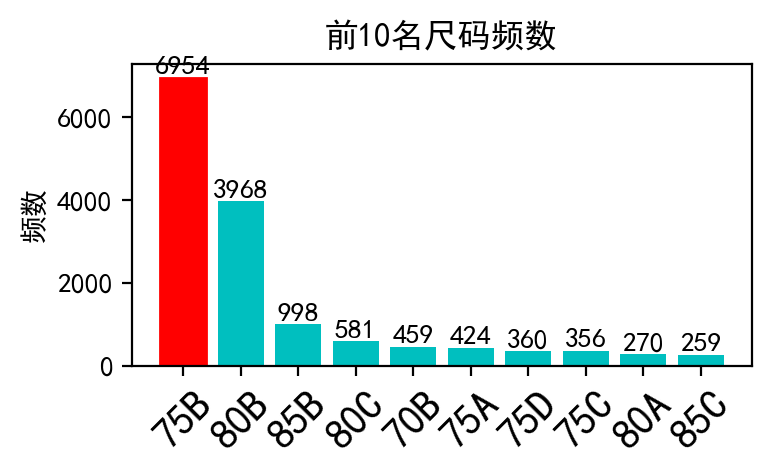

In [6]:
'''可视化尺码'''
plt.figure(figsize = (4,2), dpi = 200)
size_count = bra['productSize'].value_counts()
x=np.array(size_count.keys()[:10])
y=np.array(size_count.values[:10])
bar = plt.bar(x,y,color='c')
bar[0].set_color('r')
plt.xticks(rotation=45,fontsize=15)
plt.ylabel('频数')
plt.title('前10名尺码频数')
for a,b in zip(x,y):
    plt.text(a,b,'%.0f'%b,ha = 'center',va = 'bottom',fontsize=10)
plt.show()


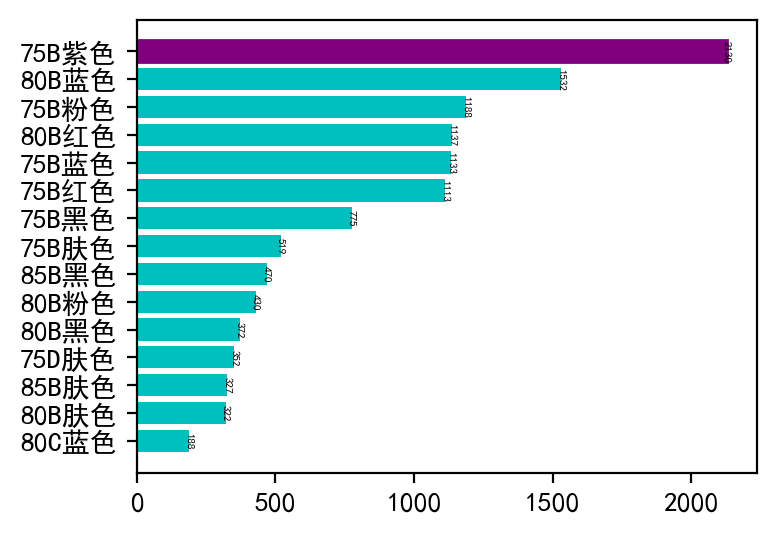

In [7]:
'''尺码和颜色组合图'''
combine = pd.Series(bra['productSize'] + bra['productcolor']).value_counts(ascending = True)
x = np.array(combine.keys()[-15:])
y = np.array(combine.values[-15:])
plt.figure(figsize = (4,3), dpi = 200)
barh = plt.barh(x,y,color='c')
barh[-1].set_color('purple')
for a,b in zip(x,y):
    plt.text(b,a,'%.0f'%b,ha = 'center',va = 'center',fontsize=4, rotation = -90)
plt.show()